<a href="https://colab.research.google.com/github/Mrfrktmrck19/Data_Science/blob/master/MyNotes/TransferFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer(Aktivasyon) Fonksiyonu Nedir?
Konuya detaylıca girmeden önce kısaca bir özet verelim. Aşşağıda bir perceptron diyagramı var. X1,X2 input/girdi değerleriydi ve W1,W2 de bu girdilere karşılık gelen ağırlık değrleri. Ağırlıklar ile girdiler çarpılıp Toplama Fonksiyonu ile toplanır. Elde edilen değerler Aktivasyon fonksiyonuna verilerek çıkış sinyali üretilir. Kısaca aktivsayon fonksiyonu çıkış sinyali üretmeyi sağlar.
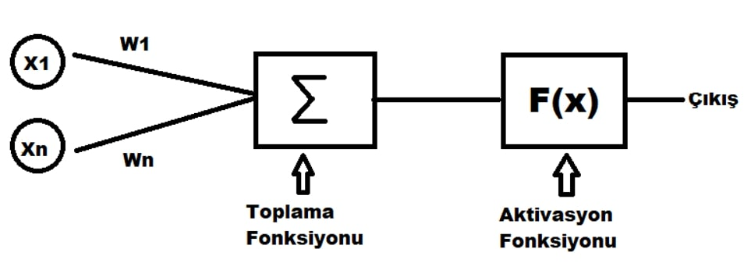

---
Peki neden "toplama fonksiyonundan" çıkan sinyali doğrudan "çıkış sinyali" olarak kullanamıyoruz? Yani neden aktivasyon fonksiyonuna ihtiyacımız var?<br> 
Yapay sinir ağlarını gündelik hayattaki problemlerimizi çözmek için kullanırız. Tasarlayacağımız modellerde bu sorunlara bir çözüm olması ve/veya üretmesi için tasarlanır. Gündelik hayattaki problemlerimizi sınıflandırdığımızda tek bir sınıfa indirgeyemeyiz. Bazı problemlerimiz daha lineerken bazıları daha komplekstir. Mesela bir taksi ücreti tahmin etme problemi lineerdir; x kadar yola y+5 tl veriyorsak 2x kadar yola 2y+5 tl(5 açılış ücreti, Veri Bilimcinin gözünden kaçmaz:)) veririz. Bu oldukça basit bir problem. Ayrıca ücret iyilimleme, gider iyiimleme gibi optimizasyon sorunları vardır ki bu sorunalrı lineer bir şekilde çözemeyiz. Burada bize üsler gerekir, daha karmaşık bir yapı gerekir, kan, acı... Matematikten de bildiğin üzere. \
İşte Aktivasyon Fonksiyonları, bizim problemimize uygun sınıfta sinyali üretmek için kullanılır. Sorunumuz regresyon ise regrasyona uygun, sınıflandırma ise de sınıflandırmaya uygun akstivasyon fonksiyonu kullanırız. Buradan da anlayacağın üzere aktivayon fonksiyonları çeşit çeşittir. Şimdi nasıl seçildiğine bakalım.
## Aktivasyon Fonksiyonları Türleri
Yapay Sinir Ağalrında 3 katman vardır; girdi, gizli ve çıktı. Gizli ve çıktı katmanlarında aktivasyon fonksiyonu kullanılır. Genellikle gizli katmanlar aynı aktivasyon fonksiyonunu kullanır. Çıktı katmanı için aktivasyon fonksiyonunu belirlerken yapılan tahmin çeşidi önemlidir. Öncelikle çıktı katmanı için aktivasyon fonksiyonlarını inceleyelim.
### Çıktı Katmanında Kullanılan Aktivasyon Fonksiyonları
YSA'da regresyon, sınıflandırma ve çoklu sınıflandırma olacak şekilde 3 çeşit tahmin tipi bulunur. Regresyon, sınıflandırma ve çoklu sunuflandırma. Regresyonu neden sonuç ilişkisine benzetebiliriz, yukarıda verdiğimiz taksi örneği gibi. Sınıflandırmaya örnek olarak bir kedi resminin piksellerini bir YSA'ya verir ve çıktı olarakta bu resimde kedinin olup olmadığının olasılık değerini alabiliriz. Çoklu sınıflandırma ise kedi ve köpeğin ayrı ayrı bulunmas olasılığı. Yapacağımız tahmine göre aktivasyon fonksiyonunu seçiyoruz.
* Lineer (Doğrusal) Fonksiyon:
Regresyonlarda kullanılır. Lineer aktivasyon fonksiyonları girdi değerlerini değiştirmeden çıktı olarak verir.
from matplotlib import pyplot
 
```
# lineer fonksiyon
def lineer(x):               #olduğu gibi çıkartıyor.
	return x
 

girdiler = [x for x in range(-10, 10)]

ciktilar = [lineer(x) for x in girdiler]

pyplot.plot(girdiler, ciktilar)
pyplot.show()

```

* Sigmoid Fonksiyonu:
Tekli sınıflandırmada kullanılır. Gelen girdi değerini (0,1) aralığına sıkıştırır. Fonksiyonun grafiği ve formulü:
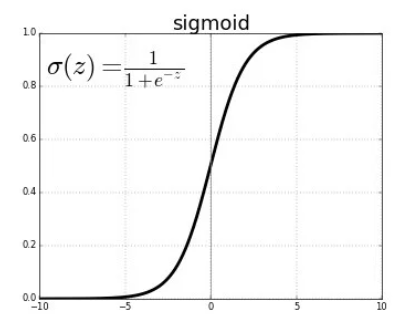



Örnek olarak eğer kedi olan bir resmi YSA modeline verip çıktı olarak sigmoid fonksiyonunda 0.85 değerini alıyorsak, bu resimde kedi olma ihtimalini %85 olarak değerlendirebiliriz. Tam tersi kedi olmayan resmi modelimize verip çıktı olarak 0.05 alıyorsak, bu resimde kedi olmama ihtimalini %99.95 olarak veya resimde kedi olma ihtimalini %0.05 olarak düşünebiliriz.
```
from math import exp
from matplotlib import pyplot
 
# sigmoid fonksiyonu
def sigmoid(x):
	return 1.0 / (1.0 + exp(-x))
 
# girdiler
girdiler = [x for x in range(-10, 10)]
# ciktilar
ciktilar = [sigmoid(x) for x in girdiler]
# grafigi cizdir
pyplot.plot(girdiler, ciktilar)
pyplot.show()
```

<br><br>
* Softmax Fonksiyonu: <br>
Çoklu sınıflandırmada kullanılır. Çıktı olarak vektör verir. Formüü aşşağıdaki gibidir:
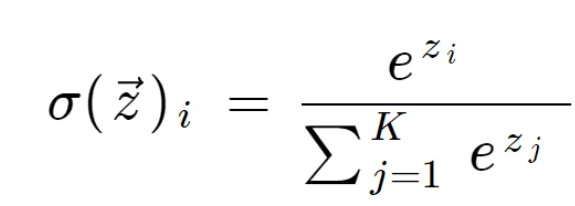
<br>
Çıktı vektörü her bir sınıfın olasılık değerini tutar. Bu olasılık değerinin toplamı 1.0 eder. Örnek olarak 0'dan 9'a kadar olan sayıların resimlerini ysa modelimize verdiğimizde çıktı olarak  [0.03, 0.07, 0.1, 0.04, 0.005, 0.001, 0.06, 0.67, 0.02, 0.004] vektörünü veriyorsa resimde %67 oranında 7 rakamı vardır diyebiliriz.

```
import numpy as np
 
# softmax fonksiyonu
def softmax(x):
	return np.exp(x) / np.exp(x).sum()
 
# girdiler
girdiler = [1.0, 3.0, 2.0]
# ciktilar
ciktilar = softmax(girdiler)
# olasilik degerlerini(ciktilari) bastir
print(ciktilar)
# olasiliklarin toplamini bastir
print(ciktilar.sum())
```

## Gizli Katmanındaki Aktivasyon Fonksiyonları
Gizli katmanda yaygın olarak kullanılan aktivasyon fonksiyonları ReLU, Sigmoid ve Tanh'dır. 
* ReLU Fonksiyonu: <br>
Gizli katmanda en çok kullanılan aktivasyon fonksiyonlarındandır. Formülü ve grafiği aşşağıdaki gibidir:
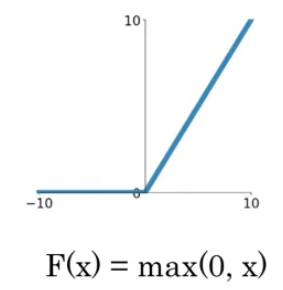
<br>
Gelen girdi değeri 0'dan büyükse aynen çıkartır, bir nevi lineer fonksiyon gibi tek farkı 0 dan küçük değerleri 0 olarak alır.

```
from matplotlib import pyplot
 
# ReLU fonksiyonu
def ReLU(x):
	return max(0.0, x)
 
# girdiler
girdiler = [x for x in range(-10, 10)]
# ciktilar
ciktilar
 = [ReLU(x) for x in girdiler]
# grafigi cizdir
pyplot.plot(girdiler, ciktilar)
pyplot.show()
```
* Tanh Fonsksiyonu: <br>
Sigmoid fonksiyonuna benzerdir. Tek farkı aralığı (-1,1) arasına almasıdır.
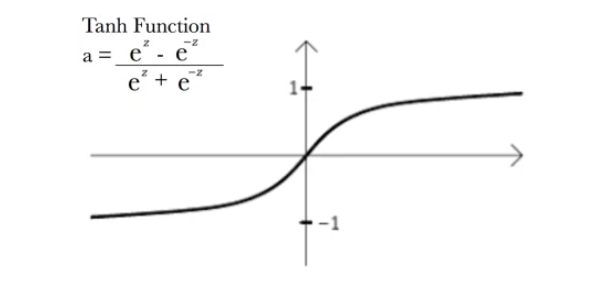

## Aktivasyon Fonksiyonları Nasıl Seçilir
Çıktı katmanında kullanacağımız aktivasyon fonksiyonunu seçmek daha kolaydır çünkü yapacağımız tahmine göre seçiyorduk. Gizli katmanlarda ise kullanacağımız aktivasyon fonksiyonunu deneme yanılma ile gerçekleştiriyoruz. Modelimizi faklı aktivasyon fonksiyonları kullanarak eğitip en iyi sonucu aldığımız ile yola devam ediyoruz.

## Aktivasyon Fonksiyonlarının Sahip Olması Gereken Özellikler
1. Doğrusal Olmama:  <br>
Önceki paragraflarda bahsettiğimiz gibi aktivasyon fonksiyonları karmaşık gerçek dünya problemlerinde kullanılabilmesi için doğrusal/lineer olmamalıdır.
2. Türevlenebilirlik: <br>
Aktivasyon fonksiyonları sürekli olmalı ve bununla birlikte birinci dereceden türevi alınabilmelidir.Optimizasyon teknikleri ve bir kaç alan için gerekir, daha sonra yazıcam.
2. Aralık: <br>
Daha efektif bir model eğitimi için aktivasyon fonksiyonlarının değerinin sonsuza gitmesini değil, belirli aralıklar içinde olmasını isteriz. 
4. Monotonluk: <br>
Aktivasyon Fonksiyonlarının monoton olması,min ve max noktlarının olacağı ve bu da öğrenmenin olacağının göstergesidir.
5. Orjine Göre Yakınsak: <br>
Aktivasyon fonksiyonalrı orjine göre yakınsak olduğunda YSA modellerinin başlangıç ağırlıkları rastgele küçük değrler olarak atandığında öğrenme gerçekleşir. Aksi halde daha farklı yöntemler ile ağırlıkları atanmaıdır.